In [1]:
import numpy as np
import scib_metrics as sm
from collections import defaultdict
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scanpy as sc

import seaborn as sb

# ASW batch
Effect of adding N noise features to batch-split feature on ASW batch

In [2]:
n=100
x_diff=np.concatenate([np.random.normal(0,1,size=n),np.random.normal(1,1,size=n)]).reshape(-1,1)
batch=np.array(['a']*n+['b']*n)

Text(0, 0.5, 'feature')

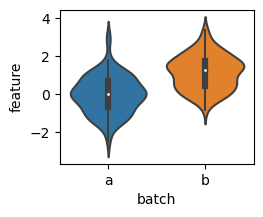

In [3]:
rcParams['figure.figsize']=(2.5,2)
sb.violinplot(y=x_diff.ravel(),x=batch)
plt.xlabel('batch')
plt.ylabel('feature')

### 1 batch & N-1 noise features

In [4]:
res=[]
for n_noise in [0,1,2,4,8]:
    for i in range(10):
        # Regenerate also the feature taht differs in batch
        x_diff=np.concatenate(
            [np.random.normal(0,1,size=n),np.random.normal(1,1,size=n)]).reshape(-1,1)
        x_noise=np.random.normal(0,1,size=(2*n,n_noise))
        x=np.concatenate([x_diff,x_noise],axis=1)
        asw=sm.silhouette_batch(
            X=x, labels=np.array(['l']*2*n), 
            batch=batch, rescale = True)
        adata=sc.AnnData(x)
        sc.pp.neighbors(adata,use_rep='X')
        ilisi=sm.ilisi_knn(X=adata.obsp['distances'], batches=batch, scale=True)
        res.append({'n_random_features':n_noise,'rep':i,'asw_batch':asw,'ilisi':ilisi})
    print(res[n_noise])
res=pd.DataFrame(res)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit f

{'n_random_features': 0, 'rep': 0, 'asw_batch': 0.71029806, 'ilisi': 0.4387047290802002}
{'n_random_features': 0, 'rep': 1, 'asw_batch': 0.7055689, 'ilisi': 0.5327272415161133}
{'n_random_features': 0, 'rep': 2, 'asw_batch': 0.6978331, 'ilisi': 0.36608850955963135}
{'n_random_features': 0, 'rep': 4, 'asw_batch': 0.7045247, 'ilisi': 0.4079256057739258}
{'n_random_features': 0, 'rep': 8, 'asw_batch': 0.7226169, 'ilisi': 0.5021858215332031}


/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='n_random_features', ylabel='asw_batch'>

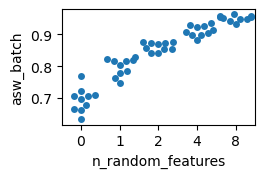

In [5]:
rcParams['figure.figsize']=(2.5,1.5)
sb.swarmplot(x='n_random_features',y='asw_batch',data=res)

<Axes: xlabel='n_random_features', ylabel='ilisi'>

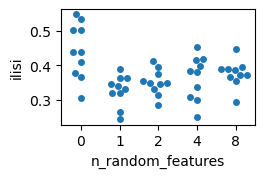

In [6]:
rcParams['figure.figsize']=(2.5,1.5)
sb.swarmplot(x='n_random_features',y='ilisi',data=res)

#### n batch & N-n random features

In [7]:
res=[]
n_total=9
for n_noise in [0,1,2,4,8]:
    for i in range(10):
        # Regenerate also the feature taht differs in batch
        x_diff=np.concatenate(
            [np.random.normal(0,1,size=(n,n_total-n_noise)),
             np.random.normal(1,1,size=(n,n_total-n_noise))])
        x_noise=np.random.normal(0,1,size=(2*n,n_noise))
        x=np.concatenate([x_diff,x_noise],axis=1)
        asw=sm.silhouette_batch(
            X=x, labels=np.array(['l']*2*n), 
            batch=batch, rescale = True)
        adata=sc.AnnData(x)
        sc.pp.neighbors(adata,use_rep='X')
        ilisi=sm.ilisi_knn(X=adata.obsp['distances'], batches=batch, scale=True)
        res.append({'n_random_features':n_noise,'rep':i,'asw_batch':asw,'ilisi':ilisi})
    print(res[n_noise])
res=pd.DataFrame(res)

{'n_random_features': 0, 'rep': 0, 'asw_batch': 0.8189781, 'ilisi': 0.041138410568237305}
{'n_random_features': 0, 'rep': 1, 'asw_batch': 0.8175643, 'ilisi': 0.017518162727355957}
{'n_random_features': 0, 'rep': 2, 'asw_batch': 0.8293041, 'ilisi': 0.03861713409423828}
{'n_random_features': 0, 'rep': 4, 'asw_batch': 0.8163492, 'ilisi': 0.040810585021972656}
{'n_random_features': 0, 'rep': 8, 'asw_batch': 0.8189904, 'ilisi': 0.044277191162109375}


/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='n_random_features', ylabel='asw_batch'>

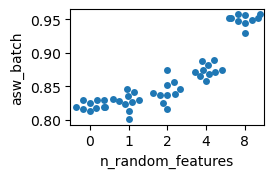

In [8]:
rcParams['figure.figsize']=(2.5,1.5)
sb.swarmplot(x='n_random_features',y='asw_batch',data=res)

/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='n_random_features', ylabel='ilisi'>

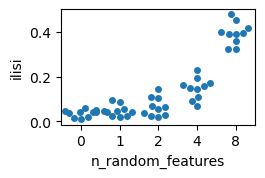

In [9]:
rcParams['figure.figsize']=(2.5,1.5)
sb.swarmplot(x='n_random_features',y='ilisi',data=res)

#### 1 batch feature & n1 random features with large noise & N-n1-1 features with small noise

In [10]:
res=[]
n_total=9
n=100
batch=np.array(['a']*n+['b']*n)
for n_noise in [0,1,2,4,8]:
    for i in range(10):
        # Regenerate also the feature taht differs in batch
        x_diff=np.concatenate(
            [np.random.normal(0,1,size=(n,1)),
             np.random.normal(1,1,size=(n,1))])
        x_noise=np.random.normal(0,1,size=(2*n,n_noise))
        x_noise_small=np.random.normal(0,0.1,size=(2*n,n_total-1-n_noise))
        x=np.concatenate([x_diff,x_noise,x_noise_small],axis=1)
        asw=sm.silhouette_batch(
            X=x, labels=np.array(['l']*2*n), 
            batch=batch, rescale = True)
        adata=sc.AnnData(x)
        sc.pp.neighbors(adata,use_rep='X')
        ilisi=sm.ilisi_knn(X=adata.obsp['distances'], batches=batch, scale=True)
        res.append({'n_random_features':n_noise,'rep':i,'asw_batch':asw,'ilisi':ilisi})
    print(res[n_noise])
res=pd.DataFrame(res)

{'n_random_features': 0, 'rep': 0, 'asw_batch': 0.7133062, 'ilisi': 0.3065459728240967}
{'n_random_features': 0, 'rep': 1, 'asw_batch': 0.69600344, 'ilisi': 0.24417614936828613}
{'n_random_features': 0, 'rep': 2, 'asw_batch': 0.6742365, 'ilisi': 0.2832221984863281}
{'n_random_features': 0, 'rep': 4, 'asw_batch': 0.7650579, 'ilisi': 0.3444403409957886}
{'n_random_features': 0, 'rep': 8, 'asw_batch': 0.6731537, 'ilisi': 0.2901453971862793}


/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, -12.777777777777782, 'n_random_largeSTD')

/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


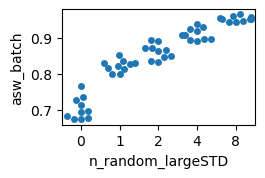

In [11]:
rcParams['figure.figsize']=(2.5,1.5)
sb.swarmplot(x='n_random_features',y='asw_batch',data=res)
plt.xlabel('n_random_largeSTD')

Text(0.5, -12.777777777777782, 'n_random_largeSTD')

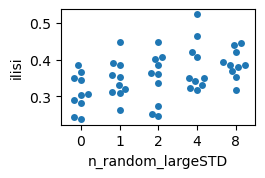

In [12]:
rcParams['figure.figsize']=(2.5,1.5)
sb.swarmplot(x='n_random_features',y='ilisi',data=res)
plt.xlabel('n_random_largeSTD')